In [2]:
from bs4 import BeautifulSoup as soup #biblioteca para web scraping
from urllib.request import urlopen as url #fazer requests http na pagina


In [3]:
joker_url = ['https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=']*29 #gerando matriz com 29 urls iguais

for i in range(len(joker_url)):
    joker_url[i] = joker_url[i] + str(i+1) #adicionando o numero da pagina

print(joker_url)

['https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=1', 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=2', 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=3', 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=4', 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=5', 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=6', 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=7', 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=8', 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=9', 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=10', 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=11', 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=12', 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=13', 'https://www.rottentomatoes.com/m

In [4]:
reviews = []

for address in joker_url:
    client = url(address)
    page = client.read()
    client.close()
    pg_soup = soup(page,'html.parser') #dividindo as informacoes, parser reconhece padrao
    reviews += [rvw.text for rvw in pg_soup.find_all('div',{'class':'the_review'})] #pegando todas reviews de usuarios, isso foi definido analisando o html da pagina / rvw.text só pega o conteudo dentro da class

In [5]:
print(reviews[0:20])

['\n                                    Undeniably compelling.\n                                ', '\n                                    While drawing heavy influence from previous Scorsese movies, Joker boasts a great performance from Phoenix and shows that darker comic book films continue to have a place in a family-oriented realm.\n                                ', "\n                                    What an electrifying performance by Phoenix ... It's the work of a fearless performer, and the result is an acting masterclass.\n                                ", '\n                                    Phillips and Phoenix deliver a shattering and fresh new take on an age-old character, a character study of the birth of the supervillain with darkly disturbing vigour.\n                                ', "\n                                    Joker  is dark, dense, violent, and monstrous. A descent into Hades that is unlike anything we've seen on screen that's inspired by a comic [F

In [6]:
import csv
with open('joker_reviews.csv','w') as joker_file:
    new = csv.writer(joker_file,quoting=csv.QUOTE_ALL)
    new.writerow(reviews) #escrevendo arquivo csv contendo as criticas

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') #download do tratador de linguagem natural

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

from wordcloud import WordCloud, ImageColorGenerator #desenhar "nuvem" de palavras
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/luisotavio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/luisotavio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/luisotavio/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
with open('joker_reviews.csv', 'r') as f:
  reader = csv.reader(f)
  reviews = list(reader)[0]

In [9]:
stop_words = set(stopwords.words('english'))  #selecionando stopwords em ingles
word_tokens=[]
for review in reviews:   
    word_tokens = word_tokens + word_tokenize(review)  #fazendo tokenizacao
   
filtered_word_reviews = [w for w in word_tokens if not w in stop_words] #removendo stopwords

In [10]:
def drawWordCloud(words, filename):
    text = ''
    for w in words:
        text = text + ' ' + w #adicionando as palavras na nuvem

    mask = np.array(Image.open("joker_mask.jpeg")) #usando a imagem da mascara do coringa como base para a nuvem de palavras, a imgem é lida e transformada em um array numpy
    image_colors = ImageColorGenerator(mask) #gerando cores para a nuvem

    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud( background_color="white", max_words=1000, mask=mask).generate(text) #criando o texto da nuvem
    
    fig, axes = plt.subplots(1,2 , figsize=(16,20)) #criando imagem com dois plots
    axes[0].imshow(mask, interpolation="bilinear") #gerando imagem da mascara original
    axes[1].imshow(wordcloud.recolor(color_func=image_colors,random_state=3),
           interpolation="bilinear") #criando imagem da nuvem
    for ax in axes:
        ax.set_axis_off() #retirar eixos
    plt.savefig(filename+".png", format="png", dpi=200) #salvando a imagem com os dois plots
    plt.show()

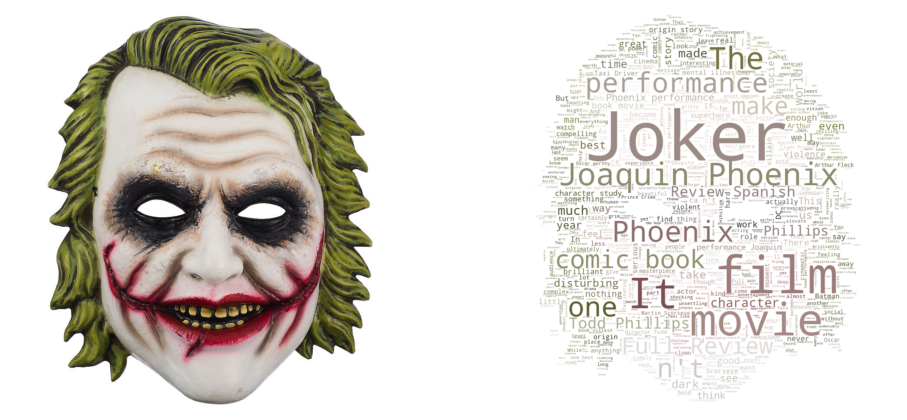

In [11]:
drawWordCloud(filtered_word_reviews, "wc-joker") #passando as palavras a serem usadas e o nome da imagem nova

In [17]:
adjs = [word for (word, pos) in nltk.pos_tag(filtered_word_reviews) if(pos[:2] == 'JJ')] #codigo que identifica apenas palavras adjetivos
print (adjs[:30])

['heavy', 'previous', 'Scorsese', 'great', 'comic', 'family-oriented', 'fearless', 'fresh', 'new', 'age-old', 'monstrous', 'inspired', 'comic', 'mere', 'conventional', 'comic', 'origin', 'second', 'complex', 'Spanish', 'melancholy', 'murky', 'realistic', 'powerful', 'good', 'psychological', 'hype', 'outstanding', 'disingenuous', 'least']


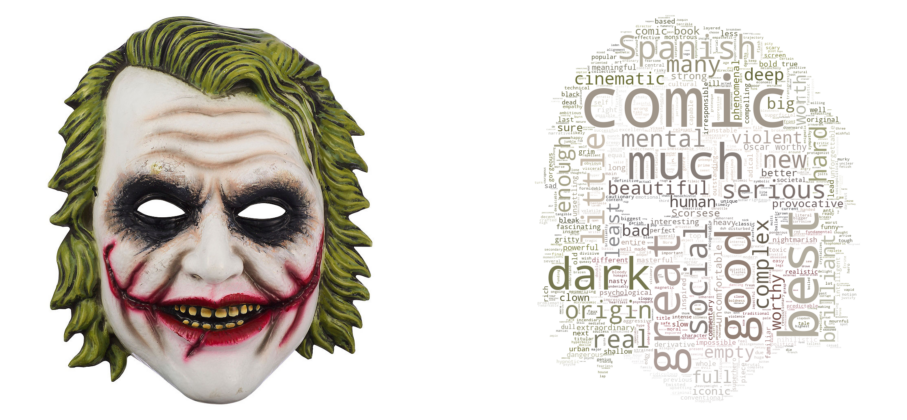

In [13]:
drawWordCloud(adjs, "wc-joker-adjs") #criando imagem com apenas adjetivos

In [15]:
from googletrans import Translator #pacote de tradutor

translator = Translator()
translations = translator.translate(adjs[:100], dest='pt') #traduzindo os adjetivos
adjs_pt = []
for translation in translations:
    adjs_pt.append(translation.text)

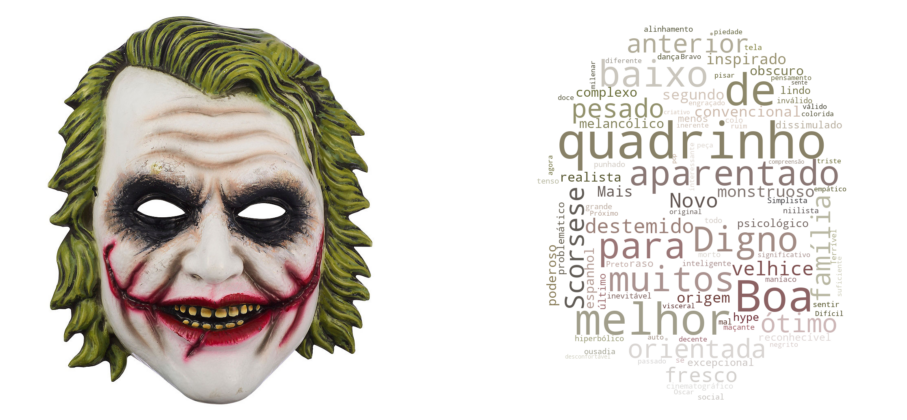

In [16]:
drawWordCloud(adjs_pt, "wc-joker-adjs-pt") #gerando nuvem com adjetivos em pt-br